In [7]:
import os
import wradlib as wrl
import numpy as np
import warnings
import csv
import fileinput
import scipy.misc
import logging

import wradlib as wrl
import matplotlib.pyplot as pl
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

os.environ["WRADLIB_DATA"] = r"/data/Radarbilder_DWD/2018"

data

In [8]:
def plot_radolan(data, attrs, grid, clabel=None):
    fig = pl.figure(figsize=(10,8))
    ax = fig.add_subplot(111, aspect='equal')
    x = grid[:,:,0]
    y = grid[:,:,1]
    pm = ax.pcolormesh(x, y, data, cmap='viridis')
    cb = fig.colorbar(pm, shrink=0.75)
    cb.set_label(clabel)
    pl.xlabel("x [km]")
    pl.ylabel("y [km]")
    pl.title('{0} Product\n{1}'.format(attrs['producttype'],
                                       attrs['datetime'].isoformat()))
    pl.xlim((x[0,0],x[-1,-1]))
    pl.ylim((y[0,0],y[-1,-1]))
    pl.grid(color='r')

In [14]:
def show_plot(url):
    radolan_grid_xy = wrl.georef.get_radolan_grid(1100, 900)
    radfile = wrl.util.get_wradlib_data_file(url)
    data, attrs = wrl.io.read_radolan_composite(radfile)
    data = np.ma.masked_equal(data, -9999)
    plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * 5min-1')
    print(data.min())
    print(data.max())

0.0
1.1400000000000001


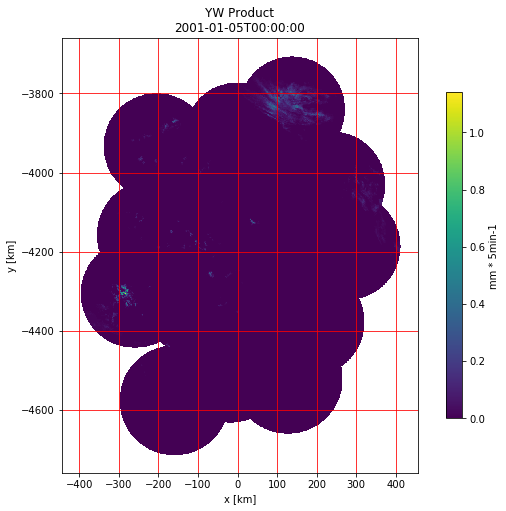

In [15]:
show_plot("/data/Radarbilder_DWD/minutely/raa01-yw2017.002_10000-0101050000-dwd---bin")

0.0
1.08


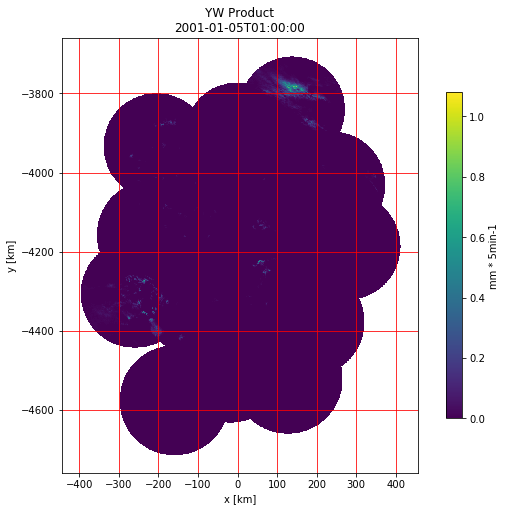

In [16]:
show_plot("/data/Radarbilder_DWD/minutely/raa01-yw2017.002_10000-0101050100-dwd---bin")

0.0
9.21


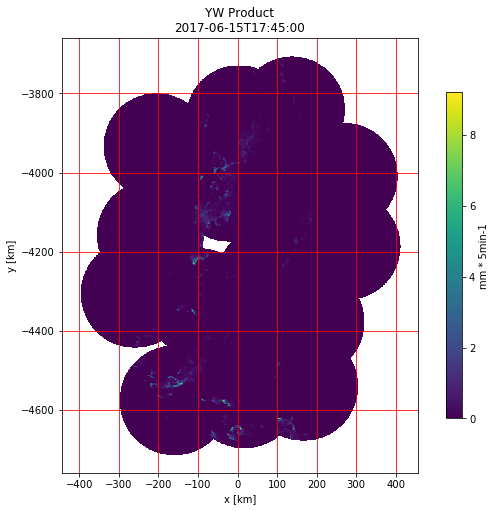

In [29]:
show_plot("/data/Radarbilder_DWD/minutely/raa01-yw2017.002_10000-1706151745-dwd---bin")

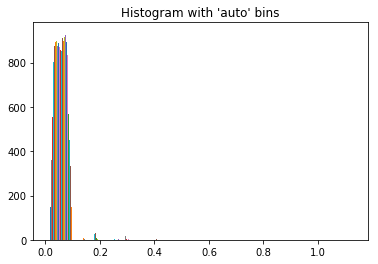

In [26]:
import matplotlib.pyplot as plt

radolan_grid_xy = wrl.georef.get_radolan_grid(1100, 900)
radfile = wrl.util.get_wradlib_data_file("/data/Radarbilder_DWD/minutely/raa01-yw2017.002_10000-0101050000-dwd---bin")
data, attrs = wrl.io.read_radolan_composite(radfile)
data = np.ma.masked_equal(data, -9999)
#a = np.histogram(data)
plt.hist(data)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

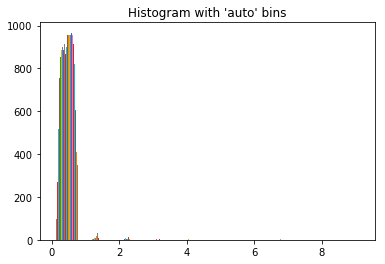

In [36]:
import matplotlib.pyplot as plt

radolan_grid_xy = wrl.georef.get_radolan_grid(1100, 900)
radfile = wrl.util.get_wradlib_data_file("/data/Radarbilder_DWD/minutely/raa01-yw2017.002_10000-1706151745-dwd---bin")
data, attrs = wrl.io.read_radolan_composite(radfile)
data = np.ma.masked_equal(data, -9999)
#a = np.histogram(data)
plt.hist(data)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [ ]:
fixed = data.filled(0)
plt.hist(fixed,bins=range(0,256, 1))  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

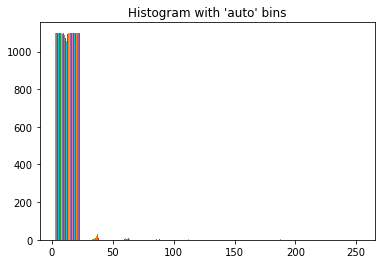

In [150]:
data = fixed * (float(255)/data.max())
plt.hist(data)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

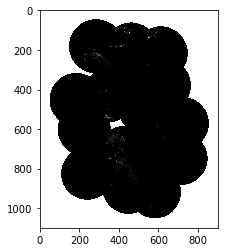

In [142]:
plt.imshow(data, cmap="gray")
plt.show()

In [132]:
import cv2
filled = data.filled(0)
cv2.imwrite("tmpFilename.png", filled)
type(filled)

numpy.ndarray

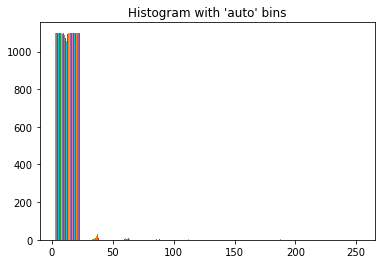

In [139]:
plt.hist(filled)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [133]:
tmp = scipy.misc.imread("tmpFilename.png")
tmp.shape

(1100, 900)

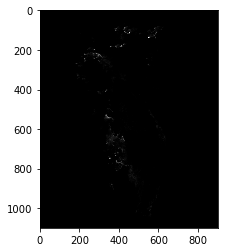

In [134]:
plt.imshow(tmp, cmap="gray")

In [135]:
tmp.dtype

dtype('uint8')

In [136]:
tmp[800, 400]

25

In [137]:
data[800, 400]

24.918566775244297

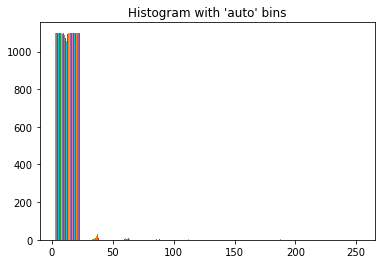

In [138]:
plt.hist(tmp)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()